In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scikit Family
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize
from sklearn.utils import Bunch
import skimage as sk

In [2]:
import pandas_profiling
%matplotlib inline

In [3]:
def load_image(Location ,dim=(150,150)):  
    """ * 150 is Height of image and 
        * 150 width of a image
    """
    image_dir = Path(Location)
    folders = [directory for directory  in image_dir.iterdir() if directory.is_dir()]
    categories  = [fo.name for fo in folders]
    
    
    images = []
    flat_data =[]
    target = []
    
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = sk.io.imread(file)
            #print("Before Transformation ")
            #plt.imshow(img)
            #plt.show()
            
            img_resized = resize(img, dim, anti_aliasing=True, mode='reflect')
            #print("After Transformation")
            plt.imshow(img_resized)
            #plt.show()
            
            # List Method append I am using Hear
            
            flat_data.append(img_resized.flatten()) 
            images.append(img_resized)
            target.append(i)
            
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    
    return Bunch(data = flat_data,
                target = target,
                target_names = categories,
                images = images)

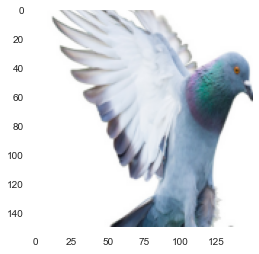

In [4]:
Data = load_image("Downloads/Birds_image")

In [5]:
Data.keys()

dict_keys(['data', 'target', 'target_names', 'images'])

In [6]:
Features = Data.data
Features.shape

(86, 67500)

In [7]:
target = Data.target
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
df = pd.DataFrame(Features)
df['Class']= target

In [9]:
df.head(2)

,0,1,2,3,4,5,6,7,8,9,...,67491,67492,67493,67494,67495,67496,67497,67498,67499,Class
0,0.304528,0.253725,0.236967,0.388277,0.290588,0.252878,0.401124,0.292444,0.253229,0.365882,...,0.897752,0.899712,0.907268,0.859033,0.860539,0.851007,0.838641,0.846484,0.804941,0
1,0.901786,0.712418,0.563399,0.899739,0.712418,0.556732,0.895425,0.708932,0.546623,0.891503,...,0.871895,0.782571,0.653813,0.862876,0.778693,0.655948,0.846667,0.763747,0.634902,0


In [10]:
df.to_csv("Birds_Classification.csv")

In [12]:
Data.target_names

['Parrot', 'Pigeon']

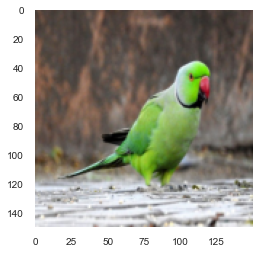

In [13]:
plt.imshow(Data.images[0])

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(Features,target)

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn  = KNeighborsClassifier(n_neighbors=3,algorithm="auto")

In [18]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
yhat = knn.predict(x_test)
yhat

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0])

In [20]:
knn.predict_proba(x_test) # Return probability estimates for the test data

array([[1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [0.33333333, 0.66666667],
       [0.66666667, 0.33333333],
       [1.        , 0.        ],
       [0.66666667, 0.33333333]])

In [21]:
Train_Score = knn.score(x_train,y_train)
Train_Score

0.8125

In [22]:
yhat = knn.predict(x_test) # New Predication for X_test data

In [23]:
Test_score = knn.score(x_test,yhat)
Test_score

1.0

In [24]:
pd.DataFrame({"Actual_data":y_test,
             "New Predication":yhat})

,Actual_data,New Predication
0,0,0
1,1,1
2,1,1
3,1,1
4,0,1
5,1,0
6,1,1
7,0,0
8,1,0
9,0,0
